# Credit Card Fraud Detection EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_preprocessing import load_data, explore_data

# Load data
df = load_data('../data/creditcard.csv')
df = explore_data(df)

Dataset shape: (284807, 31)

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentage: 0.1727%

Missing values:
0

Transaction Amount Statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


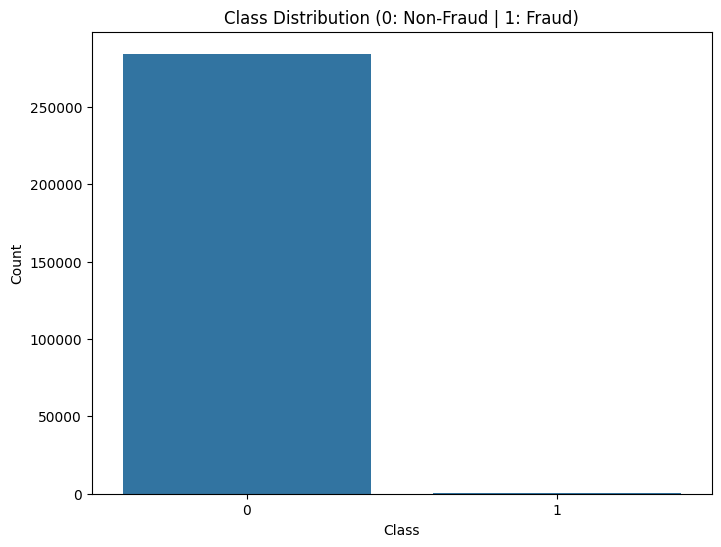

Non-Fraud transactions: 284315
Fraud transactions: 492


In [16]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud | 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print(f"Non-Fraud transactions: {df['Class'].value_counts()[0]}")
print(f"Fraud transactions: {df['Class'].value_counts()[1]}")

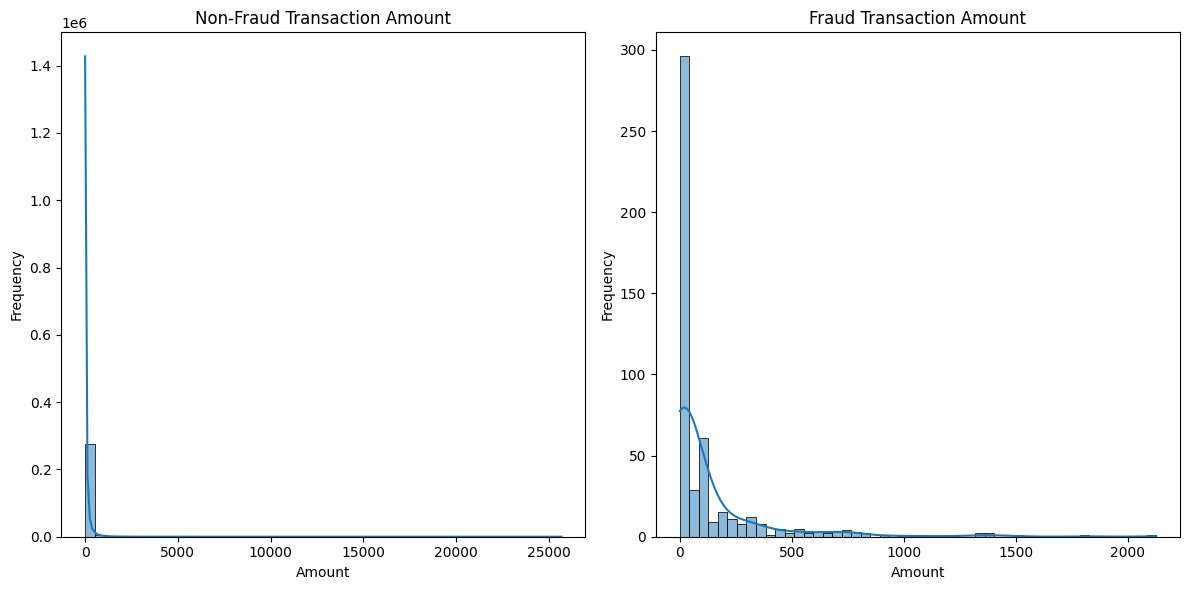

In [17]:
# Transaction Amount Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class']==0]['Amount'], bins=50, kde=True)
plt.title('Non-Fraud Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, kde=True)
plt.title('Fraud Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

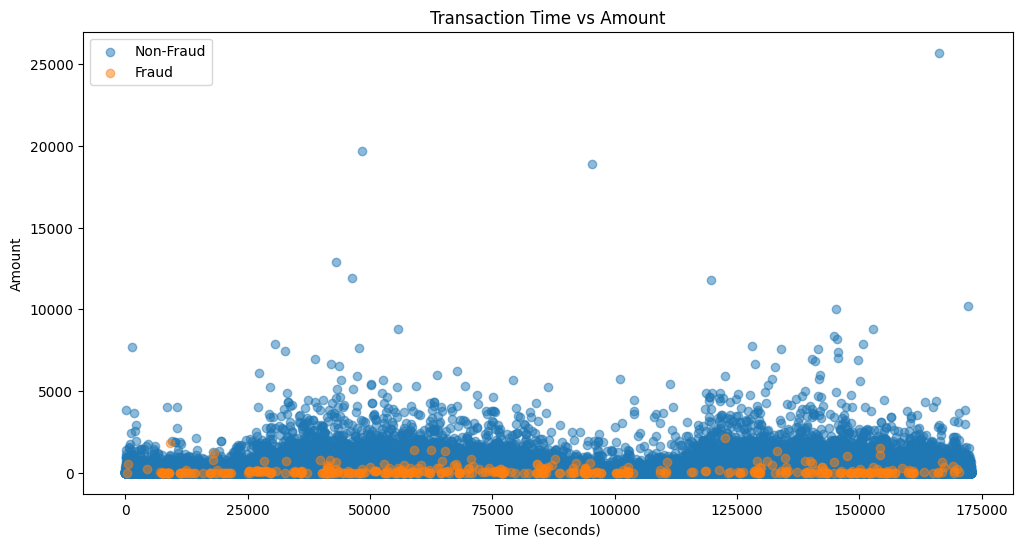

In [18]:
# Time vs Amount
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Class']==0]['Time'], df[df['Class']==0]['Amount'], alpha=0.5, label='Non-Fraud')
plt.scatter(df[df['Class']==1]['Time'], df[df['Class']==1]['Amount'], alpha=0.5, label='Fraud')
plt.title('Transaction Time vs Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.legend()
plt.show()

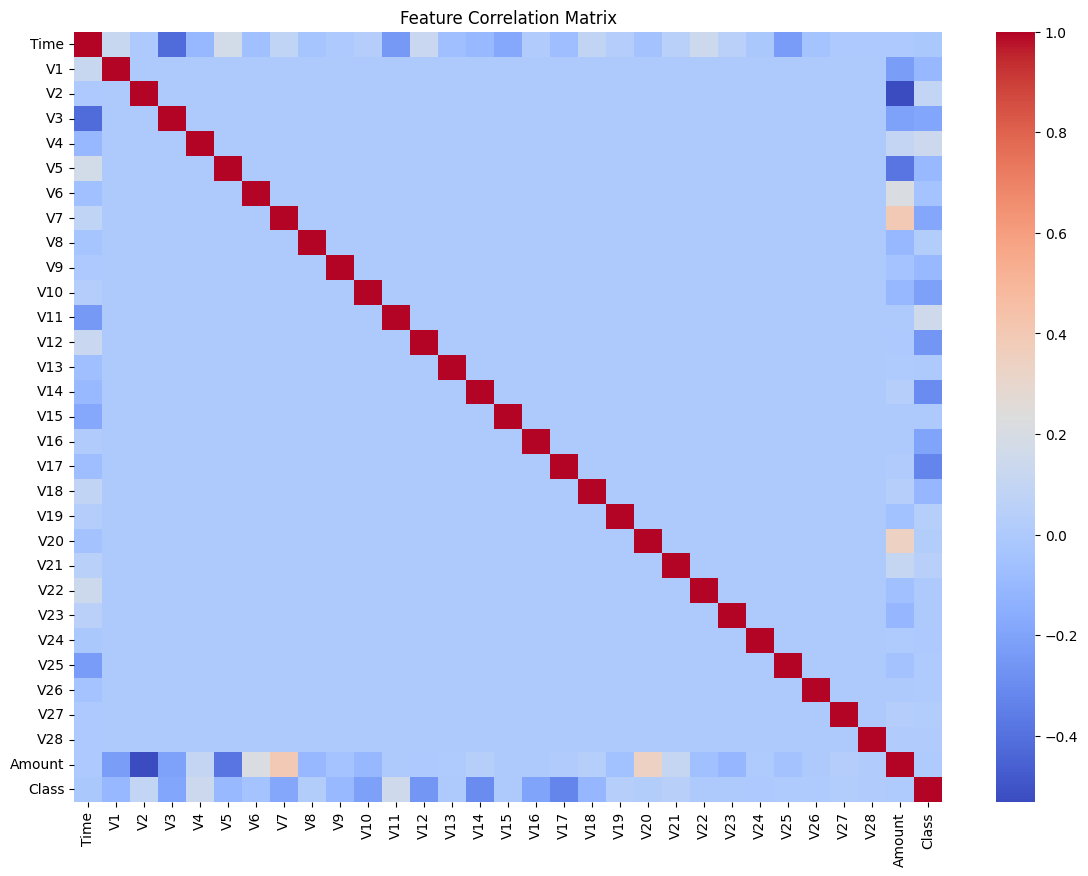

Top features correlated with fraud:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Top features negatively correlated with fraud:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [19]:
# Correlation matrix
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

# Top correlations with Class
correlations = corr_matrix['Class'].sort_values(ascending=False)
print("Top features correlated with fraud:")
print(correlations.head(10))
print("\nTop features negatively correlated with fraud:")
print(correlations.tail(10))